<a href="https://colab.research.google.com/github/safal207/hello-world/blob/master/NLP_%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B0%D0%B2%D1%82%D0%BE%D1%80%D0%B0_%D0%BF%D0%BE_%D0%BE%D1%82%D1%80%D1%8B%D0%B2%D0%BA%D0%B0%D0%BC_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%B0_Dense%2CRNN_%2CConv1d%2CLSTM%2C_GRU_%D0%B4%D0%BB%D1%8F_%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B8_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задача стоит в определении стиля текта по тестовым данным ввиде кусков произведений следующих авторов: 
Булгаков

> Булгаков

> Клиффорд_Саймак

> Клиффорд_Саймак

> Макс Фрай

> О. Генри

> Рэй Брэдберри






In [ ]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.keras.layers import Conv1D, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, CuDNNLSTM, CuDNNGRU, Bidirectional
from tensorflow.python.keras.optimizers import Adam, RMSprop

from tensorflow.keras.preprocessing.sequence import pad_sequences

#Загрузка файлов

In [ ]:
files.upload()
!ls

Saving (Булгаков) Обучающая_5 вместе.txt to (Булгаков) Обучающая_5 вместе.txt
Saving (Булгаков) Тестовая_2 вместе.txt to (Булгаков) Тестовая_2 вместе.txt
Saving (Клиффорд_Саймак) Обучающая_5 вместе.txt to (Клиффорд_Саймак) Обучающая_5 вместе.txt
Saving (Клиффорд_Саймак) Тестовая_2 вместе.txt to (Клиффорд_Саймак) Тестовая_2 вместе.txt
Saving (Макс Фрай) Обучающая_5 вместе.txt to (Макс Фрай) Обучающая_5 вместе.txt
Saving (Макс Фрай) Тестовая_2 вместе.txt to (Макс Фрай) Тестовая_2 вместе.txt
Saving (О. Генри) Обучающая_50 вместе.txt to (О. Генри) Обучающая_50 вместе.txt
Saving (О. Генри) Тестовая_20 вместе.txt to (О. Генри) Тестовая_20 вместе.txt
Saving (Рэй Брэдберри) Обучающая_22 вместе.txt to (Рэй Брэдберри) Обучающая_22 вместе.txt
Saving (Рэй Брэдберри) Тестовая_8 вместе.txt to (Рэй Брэдберри) Тестовая_8 вместе.txt
Saving (Стругацкие) Обучающая_5 вместе.txt to (Стругацкие) Обучающая_5 вместе.txt
Saving (Стругацкие) Тестовая_2 вместе.txt to (Стругацкие) Тестовая_2 вместе.txt
 sample_da

In [ ]:
!ls

#Объявление функций

In [ ]:
###########################
# Чтение файла в текст
##########################
def readText(fileName):
  f = open(fileName, 'r')
  text = f.read()
  text = text.replace("\n", " ")
  
  return text


###########################
# Очистка текста и превращение в набор слов
##########################
def text2Words(text):

  #Очищаем текст от лищних символов и переводим в нижний регистр
  text = text.replace(".", "")
  text = text.replace("—", "")
  text = text.replace(",", "")
  text = text.replace("!", "")
  text = text.replace("?", "")
  text = text.replace("…", "")
  text = text.lower()
  
  #Делим тест на слова
  words = []
  currWord = ""
  for symbol in text:
    
    if (symbol != "\ufeff"):
      if (symbol != " "):
        currWord += symbol
      else:
        if (currWord != ""):
          words.append(currWord)
          currWord = ""

  if (currWord != ""):
        words.append(currWord)
  
  return words

#Загрузка данных

**Обучающая выборка**

In [ ]:
#Загружаем чистые тексты
trainText = []
trainText.append(readText('(О. Генри) Обучающая_50 вместе.txt'))
trainText.append(readText('(Стругацкие) Обучающая_5 вместе.txt'))
trainText.append(readText('(Булгаков) Обучающая_5 вместе.txt'))
trainText.append(readText('(Клиффорд_Саймак) Обучающая_5 вместе.txt'))
trainText.append(readText('(Макс Фрай) Обучающая_5 вместе.txt'))
trainText.append(readText('(Рэй Брэдберри) Обучающая_22 вместе.txt'))

#Превращаем тексты в листы слов
trainWords = []
currWords = []
allWords = []
for txt in trainText:
  currWords = text2Words(txt)#[:10000]
  trainWords.append(currWords)
  allWords += currWords

#Запоминаем названия и количество классов
className = ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдбери"]
nClasses = len(trainWords)

#Выводим статистику по обучающей выборке
print("Тексты")
for i in range(6):
  print(className[i], " ", trainText[i][:40])

print()
print("Слова")
for i in range(6):
  print(className[i], " ", trainWords[i][:10])

print()
print("Статистика")
for i in range(6):
  print(className[i], " ", len(trainText[i]), " символов, ", len(trainWords[i]), " слов")
print("В сумме ", len(trainText[0])+len(trainText[1])+len(trainText[2])+len(trainText[3])+len(trainText[4])+len(trainText[5]), " символов, ", len(allWords), " слов")

Тексты
О. Генри   «Лиса-на-рассвете»   Коралио нежился в п
Стругацкие   Парень из преисподней     1     Ну и дер
Булгаков   ﻿Белая гвардия   Посвящается[1]  Любови 
Саймак   ﻿Всё живое...     Когда я выехал из наше
Фрай   ﻿Власть несбывшегося   – С тех пор как м
Брэдбери   ﻿451° по Фаренгейту   ДОНУ КОНГДОНУ С БЛ

Слова
О. Генри   ['«лиса-на-рассвете»', 'коралио', 'нежился', 'в', 'полуденном', 'зное', 'как', 'томная', 'красавица', 'в']
Стругацкие   ['парень', 'из', 'преисподней', '1', 'ну', 'и', 'деревня', 'сроду', 'я', 'таких']
Булгаков   ['белая', 'гвардия', 'посвящается[1]', 'любови', 'евгеньевне', 'белозерской[2]', 'пошел', 'мелкий', 'снег', 'и']
Саймак   ['всё', 'живое', 'когда', 'я', 'выехал', 'из', 'нашего', 'городишка', 'и', 'повернул']
Фрай   ['власть', 'несбывшегося', '–', 'с', 'тех', 'пор', 'как', 'меня', 'угораздило', 'побывать']
Брэдбери   ['451°', 'по', 'фаренгейту', 'дону', 'конгдону', 'с', 'благодарностью', 'если', 'тебе', 'дадут']

Статистика
О. Генри   1049517  символ

**Проверочная выборка**

In [ ]:
#Загружаем чистые тексты
testText = []
testText.append(readText('(О. Генри) Тестовая_20 вместе.txt'))
testText.append(readText('(Стругацкие) Тестовая_2 вместе.txt'))
testText.append(readText('(Булгаков) Тестовая_2 вместе.txt'))
testText.append(readText('(Клиффорд_Саймак) Тестовая_2 вместе.txt'))
testText.append(readText('(Макс Фрай) Тестовая_2 вместе.txt'))
testText.append(readText('(Рэй Брэдберри) Тестовая_8 вместе.txt'))

#Превращаем тексты в листы слов
testWords = []
currWords = []

for txt in testText:
  currWords = text2Words(txt)
  testWords.append(currWords)

#Выводим статистику по проверочной выборке
print("Тестовые тексты")
for i in range(6):
  print(className[i], " ", testText[i][:40])

print()
print("Слова")
for i in range(6):
  print(className[i], " ", testWords[i][:10])

print()
print("Статистика")
for i in range(6):
  print(className[i], " ", len(testText[i]), " символов, ", len(testWords[i]), " слов")
print("В сумме ", len(testText[0])+len(testText[1])+len(testText[2])+len(testText[3])+len(testText[4])+len(testText[5]), " символов, ", len(testWords[0])+len(testWords[1])+len(testWords[2])+len(testWords[3])+len(testWords[4])+len(testWords[5]), " слов")

Тестовые тексты
О. Генри   ﻿Багдадская птица   Без всякого сомнения
Стругацкие   ﻿ОТЕЛЬ «У ПОГИБШЕГО АЛЬПИНИСТА»    ГЛАВА
Булгаков   ﻿Дон Кихот ДЕЙСТВУЮЩИЕ ЛИЦА Алонсо Кихан
Саймак   ﻿Зачарованное паломничество    1  Гоблин
Фрай   ﻿Слишком много кошмаров    Когда баланси
Брэдбери   ﻿Марсианские хроники   МОЕЙ ЖЕНЕ МАРГАРЕ

Слова
О. Генри   ['багдадская', 'птица', 'без', 'всякого', 'сомнения', 'дух', 'и', 'гений', 'калифа', 'гаруна']
Стругацкие   ['отель', '«у', 'погибшего', 'альпиниста»', 'глава', '1', 'я', 'остановил', 'машину', 'вылез']
Булгаков   ['дон', 'кихот', 'действующие', 'лица', 'алонсо', 'кихано', 'он', 'же', 'дон', 'кихот']
Саймак   ['зачарованное', 'паломничество', '1', 'гоблин', 'со', 'стропил', 'следил', 'за', 'прячущимся', 'монахом']
Фрай   ['слишком', 'много', 'кошмаров', 'когда', 'балансируешь', 'над', 'пропастью', 'на', 'узкой', 'скользкой']
Брэдбери   ['марсианские', 'хроники', 'моей', 'жене', 'маргарет', 'с', 'искренней', 'любовью', '«великое', 'дело']

Статистика


#Создание словаря

In [ ]:
###########################
# Создание словаря - все слова, упорядоченные по частоте появления
##########################
def createVocabulary(allWords):
  
  #Создаём пустой dictionary с ключами по всем словам
  wCount = dict.fromkeys(allWords, 0)

  #Считаем количество появления каждого слова
  for word in allWords:
    wCount[word] += 1
  print("Собрана частота появления слов")

  #Сортируем лист по количеству появлений слов
  wordsList = list(wCount.items())
  wordsList.sort(key = lambda i:i[1], reverse=1)

  #Составляем список слов, отсортированных по частоте появления
  sortedWords = []
  for word in wordsList:
    sortedWords.append(word[0])
  print("Слова отсортированы по частоте")
    
  #Указываем всем словам индексы
  wordIndexes = dict.fromkeys(allWords, 0)
  wordKeys = wordIndexes.keys()
  wordKeysLen = len(wordKeys)

  index = 0
  lastPer = 0
  for word in wordKeys:
    wordIndexes[word] = sortedWords.index(word)+1
    index += 1
    per = round(100 * index / wordKeysLen)
    
    if (((per % 10) == 0) & (lastPer != per)):
      print(per, "% обработано", sep="")
      lastPer = per
  print("Собран словарь частотности слов")
  
  return wordIndexes

**Создаём словарь**

In [ ]:
vocabulary = createVocabulary(allWords)
print(len(vocabulary))

Собрана частота появления слов
Слова отсортированы по частоте
10% обработано
20% обработано
30% обработано
40% обработано
50% обработано
60% обработано
70% обработано
80% обработано
90% обработано
100% обработано
Собран словарь частотности слов
156299


**Проверяем индексы слов**

In [ ]:
vocabulary["корабль"]

2604

#Создание обучающей и проверочной выборки

In [ ]:
###########################
# Преобразования листа слов в лист индексов
##########################
def words2Indexes(words, vocabulary, maxWordsCount):
  wordsIndexes = []
  
  for word in words:
    
    #По default записываем неизвестное слово
    wordIndex = 0
    #Проверяем, есть ли текущее слово в словаре
    wordInVocabulary = word in vocabulary
    
    #Если слово есть в словаре
    if (wordInVocabulary):
      #Получаем индекс слова
      index = vocabulary[word]
      #Если индекс меньше maxWordsCount, по которому мы отсекаем словарь
      if (index < maxWordsCount):
        #То будем записывать индекс
        wordIndex = index
        
    wordsIndexes.append(wordIndex)
    
  return wordsIndexes

###########################
# Формирование индексов слов по всем классам писателей
##########################
def getTrainWordIndexes(maxWordsCount):

  #Проходим повсем 6 классам
  #И превращаем слова в индексы
  trainWordIndexes = []
  for w in trainWords:
    trainWordIndexes.append(words2Indexes(w, vocabulary, maxWordsCount))
    
  return trainWordIndexes


###########################
# Формирование обучающей выборки по листу индексов слов
# (разделение на короткие векторы)
##########################
def getSetFromIndexes(wordIndexes, xLen, step):
  xTrain = []
  wordsLen = len(wordIndexes)
  index = 0
  
  #Идём по всей длине вектора индексов
  #"Откусываем" векторы длины xLen и смещаеммся вперёд на step
  
  while (index + xLen <= wordsLen):
    xTrain.append(wordIndexes[index:index+xLen])
    index += step
    
  return xTrain


###########################
# Формирование обучающей и проверочной выборки выборки
# Из двух листов индексов от двух классов
##########################
def createSetsMultiClasses(wordIndexes, xLen, step):

  #Для каждого из 6 классов
  #Создаём обучающую выборку из индексов
  nClasses = len(wordIndexes)
  classesXTrain = []
  for wI in wordIndexes:
    classesXTrain.append(getSetFromIndexes(wI, xLen, step))

  #Формируем один общий xTrain
  xTrain = []
  yTrain = []
  
  for t in range(nClasses):
    xT = classesXTrain[t]
    for i in range(len(xT)):
      xTrain.append(xT[i])
    
    #Формируем yTrain по номеру класса
    currY = utils.to_categorical(t, nClasses)
    for i in range(len(xT)):
      yTrain.append(currY)

  xTrain = np.array(xTrain)
  yTrain = np.array(yTrain)

  
  return (xTrain, yTrain)


###########################
# Преобразование одного короткого вектора в вектор из 0 и 1
# По принципу words bag
##########################
def changeXTo01(trainVector, wordsCount):
  out = np.zeros(wordsCount)
  
  #Идём по всем индексам слов в векторе
  #И проставляем 1 в ячейку, соответствующие индексу слова
  for x in trainVector:
    out[x] = 1
    
  return out


###########################
# Преобразование выборки (обучающей или проверочной) к виду 0 и 1
# По принципу words bag
##########################
def changeSetTo01(trainSet, wordsCount):
  out = []
  
  #Прозодим по всем векторам в xTrain
  #И  превращаем каждый в вектор 01
  for x in trainSet:
    out.append(changeXTo01(x, wordsCount))
    
  return np.array(out)


###########################
# Загружаем тестовую выборку
##########################
def getTestSets(testWords, vocabulary, maxWordsCount, xLen, step):
  testWordIndexes = []
  xTest = []

  #Проходим по каждому классу проверочной выборки
  for i in range(nClasses):

    #И формируем для каждого класса xTest
    currWordIndexes = words2Indexes(testWords[i], vocabulary, maxWordsCount)
    currXTest = getSetFromIndexes(currWordIndexes, xLen, step)
    currXTest = np.array(currXTest)
    xTest.append(currXTest)
 
  return xTest
                           
                           
###########################
# Создание общей тестовой выборки
##########################
def getGlobalTestSet(xTest):
  xTestAll = []
  yTestAll = []
  
  #Проходим по всем классам и объединяем в одну большую выборку
  for i in range(nClasses):
    for j in range(len(xTest[i])):
      xTestAll.append(xTest[i][j])
      yTestAll.append(utils.to_categorical(i, nClasses))
  
  xTestAll = np.array(xTestAll)
  yTestAll = np.array(yTestAll)
  return xTestAll, yTestAll

**Подготовка данных**

In [ ]:
#Задаём базовые параметры
xLen = 1000 #Длина отрезка текста, по которой анализируем, в словах
step = 100 #Шаг разбиения исходного текста на обучающие вектора
maxWordsCount = 20000 #Число слов из словаря, которые используем для анализа

#Формируем обучающую выборку
trainWordIndexes = getTrainWordIndexes(maxWordsCount)
(xTrain, yTrain) = createSetsMultiClasses(trainWordIndexes, xLen, step)
xTrain01 = changeSetTo01(xTrain, maxWordsCount)

#Формируем тестовую выборку
xTest = getTestSets(testWords, vocabulary, maxWordsCount, xLen, step)
xTest01 = np.array([changeSetTo01(xt, maxWordsCount) for xt in xTest])
xTestAll, yTestAll = getGlobalTestSet(xTest)
xTestAll01 = changeSetTo01(xTestAll, maxWordsCount)

In [ ]:
#Пример превращения слов в индексы
print(trainWordIndexes[0])

[0, 1769, 0, 3, 0, 0, 11, 0, 7846, 3, 3305, 0, 0, 268, 1041, 14, 243, 2140, 6, 0, 0, 646, 9, 2523, 0, 0, 3, 0, 9544, 954, 11, 26, 52, 0, 126, 124, 0, 119, 1404, 3165, 0, 906, 0, 1158, 15445, 0, 34, 190, 0, 66, 0, 2645, 5096, 0, 939, 0, 1956, 0, 3306, 3, 0, 10091, 1, 0, 16941, 0, 215, 0, 0, 11, 15446, 0, 137, 711, 0, 0, 571, 268, 0, 1, 0, 0, 6640, 18, 0, 0, 366, 15447, 86, 15, 0, 0, 16942, 13108, 1526, 6, 0, 0, 0, 0, 0, 0, 9038, 7502, 49, 61, 0, 15448, 4939, 237, 268, 4176, 75, 2822, 11417, 4, 747, 3395, 3, 1769, 4177, 4782, 8, 8197, 0, 0, 1365, 6362, 2227, 0, 920, 279, 0, 7182, 337, 6911, 215, 12205, 18, 0, 138, 11417, 902, 8, 6641, 9039, 5487, 4783, 30, 0, 1, 0, 0, 13109, 3778, 6, 7183, 1, 15449, 0, 1, 0, 0, 0, 0, 13108, 0, 0, 333, 2439, 0, 0, 0, 0, 133, 39, 0, 0, 5682, 1, 3166, 7, 1526, 6, 955, 0, 8, 0, 0, 0, 1, 5488, 3, 171, 0, 18792, 4278, 0, 2032, 7, 2439, 1526, 0, 3458, 877, 10735, 14211, 92, 3, 1274, 16943, 43, 3, 1631, 2302, 10092, 15450, 683, 1499, 105, 1, 4279, 6, 529, 126, 1

In [ ]:
#Пример превращения слов в bag of words
print(xTrain01[1, 2000:2020])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
#Размер обучающей выборки, сформированной по bag of words
print(xTrain01.shape)

(17863, 20000)


**01 + Dense**





W0815 15:06:46.160669 140148497127296 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 5s 283us/sample - loss: 0.0544 - acc: 0.9830 - val_loss: 0.8029 - val_acc: 0.7724
Epoch 2/20
17863/17863 [==============================] - 4s 233us/sample - loss: 4.6296e-04 - acc: 1.0000 - val_loss: 0.6323 - val_acc: 0.8356
Epoch 3/20
17863/17863 [==============================] - 4s 235us/sample - loss: 2.8544e-04 - acc: 1.0000 - val_loss: 0.4740 - val_acc: 0.8744
Epoch 4/20
17863/17863 [==============================] - 4s 235us/sample - loss: 1.8294e-04 - acc: 1.0000 - val_loss: 0.3771 - val_acc: 0.8902
Epoch 5/20
17863/17863 [==============================] - 4s 233us/sample - loss: 1.3403e-04 - acc: 1.0000 - val_loss: 0.3341 - val_acc: 0.8950
Epoch 6/20
17863/17863 [==============================] - 4s 235us/sample - loss: 1.0732e-04 - acc: 1.0000 - val_loss: 0.3162 - val_acc: 0.8965
Epoch 7/20
17863/17863 [==============================] - 4s 235us/sample - loss: 8.7691e-0

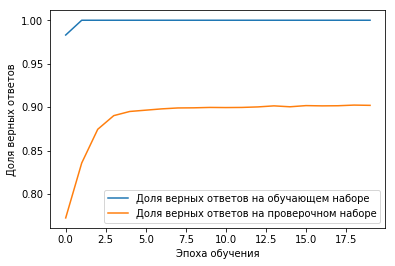

In [ ]:
#Создаём полносвязную сеть
model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='softmax'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll01, yTestAll))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Распознавание проверочной выборки

In [ ]:
###########################
# Расспознаём тестовую выборку и выводим результаты
##########################
def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  #Проходим по всем классам
  for i in range(nClasses):
    #Получаем результаты распознавания класса по блокам слов длины xLen
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    #Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    #Считаем процент распознавания каждого класса за каждый
    #Получам матрицу 6 на 6
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    #Определяем, какой в класс в итоге за какой был распознан
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    #Выводим результаты распознавания по текущему классу
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " расспознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)
  
  #Выводим вредний процент распознавания по всем классам вместе
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
    
  print()
  
  return sumVal/sumCount

In [ ]:
#Проверяем точность нейронки обученной на bag of words
pred = recognizeMultiClass(model01, xTest01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри  расспознано  95 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  85 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  расспознано  77 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  86 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  расспознано  94 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  99 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  90 %



#Embedding

In [ ]:
#Задаём параметы для обучения Embedding нейронки
xLen = 1000
step = 100
maxWordsCount = 50000

#Загружаем обучающуюу выборку
trainWordIndexes = getTrainWordIndexes(maxWordsCount)
(xTrain, yTrain) = createSetsMultiClasses(trainWordIndexes, xLen, step)

#Загружаем тестовую выборку
xTest = getTestSets(testWords, vocabulary, maxWordsCount, xLen, step)
xTestAll, yTestAll = getGlobalTestSet(xTest)

**Embedding + Dense**

In [ ]:
#Создаём сеть с Embedding слоем
modelE = Sequential()
modelE.add(Embedding(maxWordsCount, 30, input_length=xLen))
modelE.add(SpatialDropout1D(0.2))
modelE.add(Flatten())
modelE.add(BatchNormalization())
modelE.add(Dense(200, activation="relu"))
modelE.add(Dropout(0.25))
modelE.add(BatchNormalization())
modelE.add(Dense(6, activation='softmax'))

modelE.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на xTrain
history = modelE.fit(xTrain, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll, yTestAll))


plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Проверяем результаты работы Ebedding сети
pred = recognizeMultiClass(modelE, xTest, "Embedding + Dense")

#Реккурентные сети

In [ ]:
#Задаём параметы для обучения Embedding нейронки
xLen = 1000
step = 100
maxWordsCount = 20000

#Загружаем обучающуюу выборку
trainWordIndexes = getTrainWordIndexes(maxWordsCount)
(xTrain, yTrain) = createSetsMultiClasses(trainWordIndexes, xLen, step)

#Загружаем тестовую выборку
xTest = getTestSets(testWords, vocabulary, maxWordsCount, xLen, step)
xTestAll, yTestAll = getGlobalTestSet(xTest)

**Simple RNN**

W0817 07:50:00.156831 140022856697728 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0817 07:50:00.190469 140022856697728 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 17863 samples, validate on 6674 samples
Epoch 1/2
17863/17863 [==============================] - 90s 5ms/sample - loss: 1.7717 - acc: 0.3152 - val_loss: 1.7667 - val_acc: 0.2983
Epoch 2/2
17863/17863 [==============================] - 88s 5ms/sample - loss: 1.7359 - acc: 0.3265 - val_loss: 1.7470 - val_acc: 0.2983


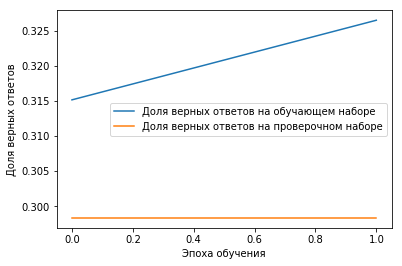

NameError: ignored

In [ ]:
modelRNN = Sequential()
modelRNN.add(Embedding(maxWordsCount, 10, input_length=xLen))
modelRNN.add(SimpleRNN(2, dropout=0.2, recurrent_dropout=0.2, activation="relu"))
modelRNN.add(Dense(6, activation='softmax'))

modelRNN.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = modelRNN.fit(xTrain, 
                    yTrain, 
                    epochs=2,
                    batch_size=200,
                    validation_data=(xTestAll, yTestAll))


plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(modelRNN, xTest, "Simple RNN")

**Simple RNN**

In [ ]:
modelRNN = Sequential()
modelRNN.add(Embedding(maxWordsCount, 10, input_length=xLen))
modelRNN.add(SpatialDropout1D(0.3))
modelRNN.add(BatchNormalization())
modelRNN.add(SimpleRNN(2, dropout=0.2, recurrent_dropout=0.2, activation="relu"))
modelRNN.add(BatchNormalization())
modelRNN.add(Dense(100, activation='relu'))
modelRNN.add(Dropout(0.3))
modelRNN.add(BatchNormalization())
modelRNN.add(Dense(6, activation='softmax'))

modelRNN.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = modelRNN.fit(xTrain, 
                    yTrain, 
                    epochs=2,
                    batch_size=200,
                    validation_data=(xTestAll, yTestAll))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(modelRNN, xTest, "Simple RNN")

**GRU**

In [ ]:
modelGRU = Sequential()
modelGRU.add(Embedding(maxWordsCount, 10, input_length=xLen))
modelGRU.add(SpatialDropout1D(0.3))
modelGRU.add(BatchNormalization())
modelGRU.add(GRU(2, dropout=0.2, recurrent_dropout=0.2, activation="relu"))
modelGRU.add(Dropout(0.3))
modelGRU.add(BatchNormalization())
modelGRU.add(Dense(100, activation='relu'))
modelGRU.add(Dropout(0.3))
modelGRU.add(BatchNormalization())
modelGRU.add(Dense(6, activation='softmax'))

modelGRU.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = modelGRU.fit(xTrain, 
                    yTrain, 
                    epochs=2,
                    batch_size=200,
                    validation_data=(xTestAll, yTestAll))


plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(modelGRU, xTest, "GRU")

**LSTM**

Train on 100 samples, validate on 100 samples
Epoch 1/2
100/100 [==============================] - 5s 50ms/sample - loss: 2.4121 - acc: 0.2000 - val_loss: 1.7499 - val_acc: 1.0000
Epoch 2/2
100/100 [==============================] - 3s 32ms/sample - loss: 2.4665 - acc: 0.1900 - val_loss: 1.7303 - val_acc: 1.0000


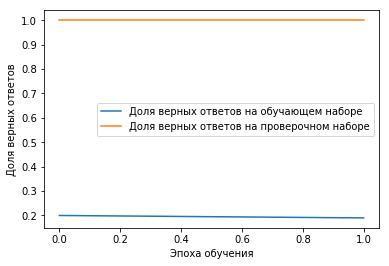

НЕЙРОНКА:  LSTM

О. Генри  расспознано  100 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  0 % сеть считает, что это  О. Генри ,  распознано НЕ ВЕРНО!
Булгаков  расспознано  0 % сеть считает, что это  О. Генри ,  распознано НЕ ВЕРНО!
Саймак  расспознано  0 % сеть считает, что это  О. Генри ,  распознано НЕ ВЕРНО!
Фрай  расспознано  0 % сеть считает, что это  О. Генри ,  распознано НЕ ВЕРНО!
Брэдбери  расспознано  0 % сеть считает, что это  О. Генри ,  распознано НЕ ВЕРНО!

Средний процент распознавания  7 %



In [ ]:
modelLSTM = Sequential()
modelLSTM.add(Embedding(maxWordsCount, 10, input_length=xLen))
modelLSTM.add(SpatialDropout1D(0.3))
modelLSTM.add(BatchNormalization())
modelLSTM.add(LSTM(2, dropout=0.2, recurrent_dropout=0.2, activation="relu"))
modelLSTM.add(BatchNormalization())
modelLSTM.add(Dense(100, activation='relu'))
modelLSTM.add(Dropout(0.3))
modelLSTM.add(BatchNormalization())
modelLSTM.add(Dense(6, activation='softmax'))

modelLSTM.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = modelLSTM.fit(xTrain[:100], 
                    yTrain[:100], 
                    epochs=2,
                    batch_size=200,
                    validation_data=(xTestAll[:100], yTestAll[:100]))


plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(modelLSTM, xTest, "LSTM")

**Ускоренная GRU**

In [ ]:
modelCudnnGRU = Sequential()
modelCudnnGRU.add(Embedding(maxWordsCount, 50, input_length=xLen))
modelCudnnGRU.add(SpatialDropout1D(0.3))
modelCudnnGRU.add(BatchNormalization())
modelCudnnGRU.add(CuDNNGRU(4))
modelCudnnGRU.add(Dropout(0.3))
modelCudnnGRU.add(BatchNormalization())
modelCudnnGRU.add(Dense(100, activation='relu'))
modelCudnnGRU.add(Dropout(0.3))
modelCudnnGRU.add(BatchNormalization())
modelCudnnGRU.add(Dense(6, activation='softmax'))

modelCudnnGRU.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = modelCudnnGRU.fit(xTrain, 
                    yTrain, 
                    epochs=2,
                    batch_size=200,
                    validation_data=(xTestAll, yTestAll))


plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(modelCudnnGRU, xTest, "CuDNN GRU")

**Ускоренная LSTM**

Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 13s 732us/sample - loss: 1.9486 - acc: 0.2413 - val_loss: 1.7402 - val_acc: 0.2983
Epoch 2/20
17863/17863 [==============================] - 12s 664us/sample - loss: 1.7578 - acc: 0.3112 - val_loss: 1.7258 - val_acc: 0.2983
Epoch 3/20
17863/17863 [==============================] - 12s 660us/sample - loss: 1.5434 - acc: 0.3907 - val_loss: 1.7945 - val_acc: 0.1645
Epoch 4/20
17863/17863 [==============================] - 12s 651us/sample - loss: 1.3063 - acc: 0.4833 - val_loss: 1.9521 - val_acc: 0.1587
Epoch 5/20
17863/17863 [==============================] - 12s 650us/sample - loss: 1.1129 - acc: 0.5617 - val_loss: 2.0494 - val_acc: 0.2318
Epoch 6/20
17863/17863 [==============================] - 11s 632us/sample - loss: 0.9449 - acc: 0.6248 - val_loss: 1.8843 - val_acc: 0.3269
Epoch 7/20
17863/17863 [==============================] - 11s 622us/sample - loss: 0.8182 - acc: 0.6685 -

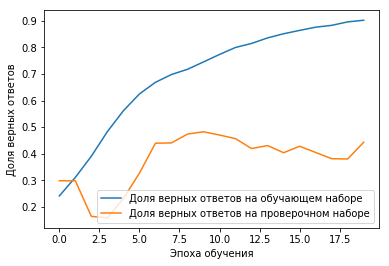

НЕЙРОНКА:  CuDNN LSTM

О. Генри  расспознано  57 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  61 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  расспознано  29 % сеть считает, что это  О. Генри ,  распознано НЕ ВЕРНО!
Саймак  расспознано  70 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  расспознано  64 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  0 % сеть считает, что это  Саймак ,  распознано НЕ ВЕРНО!

Средний процент распознавания  44 %



In [ ]:
modelCudnnLSTM = Sequential()
modelCudnnLSTM.add(Embedding(maxWordsCount, 50, input_length=xLen))
modelCudnnLSTM.add(SpatialDropout1D(0.3))
modelCudnnLSTM.add(BatchNormalization())
modelCudnnLSTM.add(CuDNNLSTM(4))
modelCudnnLSTM.add(Dropout(0.3))
modelCudnnLSTM.add(BatchNormalization())
modelCudnnLSTM.add(Dense(100, activation='relu'))
modelCudnnLSTM.add(Dropout(0.3))
modelCudnnLSTM.add(BatchNormalization())
modelCudnnLSTM.add(Dense(6, activation='softmax'))

modelCudnnLSTM.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = modelCudnnLSTM.fit(xTrain, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll, yTestAll))


plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(modelCudnnLSTM, xTest, "CuDNN LSTM")

**Двунаправленная LSTM**

In [ ]:
modelBLSTM = Sequential()
modelBLSTM.add(Embedding(maxWordsCount, 50, input_length=xLen))
modelBLSTM.add(SpatialDropout1D(0.3))
modelBLSTM.add(BatchNormalization())
modelBLSTM.add(Bidirectional(CuDNNLSTM(8)))
modelBLSTM.add(Dropout(0.3))
modelBLSTM.add(BatchNormalization())
modelBLSTM.add(Dense(100, activation='relu'))
modelBLSTM.add(Dropout(0.3))
modelBLSTM.add(BatchNormalization())
modelBLSTM.add(Dense(6, activation='softmax'))

modelBLSTM.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = modelBLSTM.fit(xTrain, 
                    yTrain, 
                    epochs=2,
                    batch_size=200,
                    validation_data=(xTestAll, yTestAll))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(modelBLSTM, xTest, "Двунаправленная LSTM")

**Два слоя LSTM подряд**

Train on 17863 samples, validate on 6674 samples
Epoch 1/2
17863/17863 [==============================] - 16s 910us/sample - loss: 1.4248 - acc: 0.7559 - val_loss: 11.1229 - val_acc: 0.1588
Epoch 2/2
17863/17863 [==============================] - 14s 811us/sample - loss: 0.0801 - acc: 0.9847 - val_loss: 28.1621 - val_acc: 0.1588


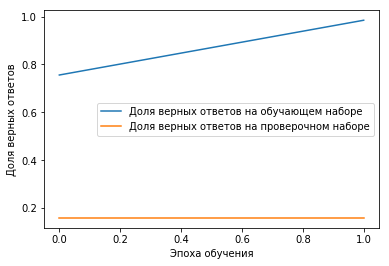

НЕЙРОНКА:  Два слоя LSTM

О. Генри  расспознано  0 % сеть считает, что это  Стругацкие ,  распознано НЕ ВЕРНО!
Стругацкие  расспознано  100 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  расспознано  0 % сеть считает, что это  Стругацкие ,  распознано НЕ ВЕРНО!
Саймак  расспознано  0 % сеть считает, что это  Стругацкие ,  распознано НЕ ВЕРНО!
Фрай  расспознано  0 % сеть считает, что это  Стругацкие ,  распознано НЕ ВЕРНО!
Брэдбери  расспознано  0 % сеть считает, что это  Стругацкие ,  распознано НЕ ВЕРНО!

Средний процент распознавания  15 %



In [ ]:
modelLSTM2 = Sequential()
modelLSTM2.add(Embedding(maxWordsCount, 50, input_length=xLen))
modelLSTM2.add(SpatialDropout1D(0.3))
modelLSTM2.add(BatchNormalization())
modelLSTM2.add(CuDNNLSTM(4, return_sequences=1))
modelLSTM2.add(CuDNNLSTM(4))
modelLSTM2.add(Dropout(0.3))
modelLSTM2.add(BatchNormalization())
modelLSTM2.add(Dense(100, activation='relu'))
modelLSTM2.add(Dropout(0.3))
modelLSTM2.add(BatchNormalization())
modelLSTM2.add(Dense(6, activation='softmax'))

modelLSTM2.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = modelLSTM2.fit(xTrain, 
                    yTrain, 
                    epochs=2,
                    batch_size=200,
                    validation_data=(xTestAll, yTestAll))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(modelLSTM2, xTest, "Два слоя LSTM")

#Одномерные свёрточные сети

**Свёрточная сеть**

Train on 17863 samples, validate on 6674 samples
Epoch 1/2
17863/17863 [==============================] - 3s 195us/sample - loss: 0.9011 - acc: 0.6847 - val_loss: 2.8089 - val_acc: 0.1885
Epoch 2/2
17863/17863 [==============================] - 2s 110us/sample - loss: 0.0298 - acc: 0.9909 - val_loss: 3.6332 - val_acc: 0.3873


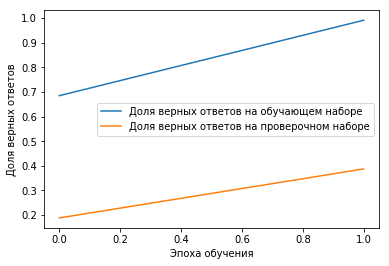

НЕЙРОНКА:  Conv1D

О. Генри  расспознано  0 % сеть считает, что это  Булгаков ,  распознано НЕ ВЕРНО!
Стругацкие  расспознано  0 % сеть считает, что это  Булгаков ,  распознано НЕ ВЕРНО!
Булгаков  расспознано  99 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  0 % сеть считает, что это  Булгаков ,  распознано НЕ ВЕРНО!
Фрай  расспознано  64 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  0 % сеть считает, что это  Булгаков ,  распознано НЕ ВЕРНО!

Средний процент распознавания  38 %



In [ ]:
modelC = Sequential()
modelC.add(Embedding(maxWordsCount, 10, input_length=xLen))
modelC.add(SpatialDropout1D(0.2))
modelC.add(BatchNormalization())
modelC.add(Conv1D(20, 5, activation="relu"))
modelC.add(MaxPooling1D(2))
modelC.add(Dropout(0.2))
modelC.add(BatchNormalization())
modelC.add(Flatten())
modelC.add(Dense(6, activation='softmax'))

modelC.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = modelC.fit(xTrain, 
                    yTrain, 
                    epochs=2,
                    batch_size=200,
                    validation_data=(xTestAll, yTestAll))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(modelC, xTest, "Conv1D")

**Два блока свёрточной сети**

Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 6s 344us/sample - loss: 1.1359 - acc: 0.5900 - val_loss: 3.0417 - val_acc: 0.1958
Epoch 2/20
17863/17863 [==============================] - 4s 214us/sample - loss: 0.1419 - acc: 0.9556 - val_loss: 7.1084 - val_acc: 0.1588
Epoch 3/20
17863/17863 [==============================] - 4s 216us/sample - loss: 0.0317 - acc: 0.9917 - val_loss: 9.4960 - val_acc: 0.1588
Epoch 4/20
17863/17863 [==============================] - 4s 211us/sample - loss: 0.0206 - acc: 0.9939 - val_loss: 7.2630 - val_acc: 0.3674
Epoch 5/20
17863/17863 [==============================] - 4s 212us/sample - loss: 0.0155 - acc: 0.9960 - val_loss: 4.6446 - val_acc: 0.3635
Epoch 6/20
17863/17863 [==============================] - 4s 213us/sample - loss: 0.0155 - acc: 0.9954 - val_loss: 2.6158 - val_acc: 0.4963
Epoch 7/20
17863/17863 [==============================] - 4s 218us/sample - loss: 0.0113 - acc: 0.9966 - val_lo

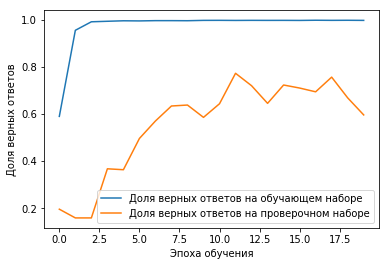

НЕЙРОНКА:  Двойная Conv1D

О. Генри  расспознано  98 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  5 % сеть считает, что это  О. Генри ,  распознано НЕ ВЕРНО!
Булгаков  расспознано  77 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  14 % сеть считает, что это  О. Генри ,  распознано НЕ ВЕРНО!
Фрай  расспознано  68 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  74 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  59 %



In [ ]:
modelC2 = Sequential()
modelC2.add(Embedding(maxWordsCount, 10, input_length=xLen))
modelC2.add(SpatialDropout1D(0.2))
modelC2.add(BatchNormalization())

modelC2.add(Conv1D(20, 5, activation="relu"))
modelC2.add(Conv1D(20, 5, activation="relu"))
modelC2.add(MaxPooling1D(2))
modelC2.add(Dropout(0.2))
modelC2.add(BatchNormalization())

modelC2.add(Conv1D(20, 5, activation="relu"))
modelC2.add(Conv1D(20, 5, activation="relu"))
modelC2.add(MaxPooling1D(2))
modelC2.add(Dropout(0.2))
modelC2.add(BatchNormalization())

modelC2.add(Flatten())
modelC2.add(Dense(100, activation='relu'))
modelC2.add(Dropout(0.2))
modelC2.add(BatchNormalization())
modelC2.add(Dense(6, activation='softmax'))

modelC2.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = modelC2.fit(xTrain, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll, yTestAll))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(modelC2, xTest, "Двойная Conv1D")

**Соединение саёрточного и LSTM слоя**

In [ ]:
modelConvLSTM = Sequential()
modelConvLSTM.add(Embedding(maxWordsCount, 10, input_length=xLen))
modelConvLSTM.add(SpatialDropout1D(0.2))
modelConvLSTM.add(BatchNormalization())

modelConvLSTM.add(Conv1D(20, 5, activation="relu"))
modelConvLSTM.add(Conv1D(20, 5, activation="relu"))
modelConvLSTM.add(MaxPooling1D(2))
modelConvLSTM.add(Dropout(0.2))
modelConvLSTM.add(BatchNormalization())

modelConvLSTM.add(CuDNNLSTM(4))
modelConvLSTM.add(Dropout(0.2))
modelConvLSTM.add(BatchNormalization())

modelConvLSTM.add(Dense(100, activation='relu'))
modelConvLSTM.add(Dropout(0.2))
modelConvLSTM.add(BatchNormalization())
modelConvLSTM.add(Dense(6, activation='softmax'))

modelConvLSTM.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = modelConvLSTM.fit(xTrain, 
                    yTrain, 
                    epochs=2,
                    batch_size=200,
                    validation_data=(xTestAll, yTestAll))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(modelConvLSTM, xTest, "Conv1D + LSTM")

**Соединение LSTM и свёрточного слоя**

Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 16s 888us/sample - loss: 0.8637 - acc: 0.6875 - val_loss: 3.3567 - val_acc: 0.2062
Epoch 2/20
17863/17863 [==============================] - 12s 662us/sample - loss: 0.0710 - acc: 0.9819 - val_loss: 6.2416 - val_acc: 0.1588
Epoch 3/20
17863/17863 [==============================] - 11s 640us/sample - loss: 0.0235 - acc: 0.9939 - val_loss: 6.5621 - val_acc: 0.1668
Epoch 4/20
17863/17863 [==============================] - 12s 647us/sample - loss: 0.0163 - acc: 0.9956 - val_loss: 8.6837 - val_acc: 0.2920
Epoch 5/20
17863/17863 [==============================] - 11s 636us/sample - loss: 0.0135 - acc: 0.9962 - val_loss: 4.9392 - val_acc: 0.2523
Epoch 6/20
17863/17863 [==============================] - 12s 645us/sample - loss: 0.0116 - acc: 0.9970 - val_loss: 3.3668 - val_acc: 0.4420
Epoch 7/20
17863/17863 [==============================] - 11s 641us/sample - loss: 0.0119 - acc: 0.9962 -

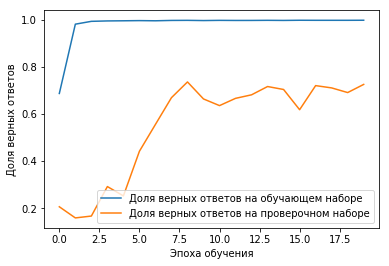

НЕЙРОНКА:  LSTM + Conv1D

О. Генри  расспознано  86 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  21 % сеть считает, что это  Булгаков ,  распознано НЕ ВЕРНО!
Булгаков  расспознано  85 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  59 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  расспознано  80 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  89 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  72 %



In [ ]:
modelLSTMConv = Sequential()
modelLSTMConv.add(Embedding(maxWordsCount, 10, input_length=xLen))
modelLSTMConv.add(SpatialDropout1D(0.2))
modelLSTMConv.add(BatchNormalization())

modelLSTMConv.add(CuDNNLSTM(4, return_sequences=1))
modelLSTMConv.add(Dropout(0.2))
modelLSTMConv.add(BatchNormalization())

modelLSTMConv.add(Conv1D(20, 5, activation="relu"))
modelLSTMConv.add(Conv1D(20, 5, activation="relu"))
modelLSTMConv.add(MaxPooling1D(2))
modelLSTMConv.add(Dropout(0.2))
modelLSTMConv.add(BatchNormalization())

modelLSTMConv.add(Flatten())
modelLSTMConv.add(Dense(100, activation='relu'))
modelLSTMConv.add(Dropout(0.2))
modelLSTMConv.add(BatchNormalization())
modelLSTMConv.add(Dense(6, activation='softmax'))

modelLSTMConv.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = modelLSTMConv.fit(xTrain, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll, yTestAll))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(modelLSTMConv, xTest, "LSTM + Conv1D")

# Выводы: 

1.   Первое место: 90%/ НЕЙРОНКА:  Тексты 01 + Dense

О. Генри  расспознано  95 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  85 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  расспознано  77 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  86 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  расспознано  94 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  99 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  90 %
2.   Второе место: 72 %
НЕЙРОНКА:  LSTM + Conv1D

О. Генри  расспознано  86 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  21 % сеть считает, что это  Булгаков ,  распознано НЕ ВЕРНО!
Булгаков  расспознано  85 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  59 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  расспознано  80 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  89 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  72 %

3. Третье место: 59%
НЕЙРОНКА:  Двойная Conv1D

О. Генри  расспознано  98 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  5 % сеть считает, что это  О. Генри ,  распознано НЕ ВЕРНО!
Булгаков  расспознано  77 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  14 % сеть считает, что это  О. Генри ,  распознано НЕ ВЕРНО!
Фрай  расспознано  68 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  74 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  59 %


